In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
df=pd.read_csv('placement-dataset.csv')

In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.shape

(100, 4)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


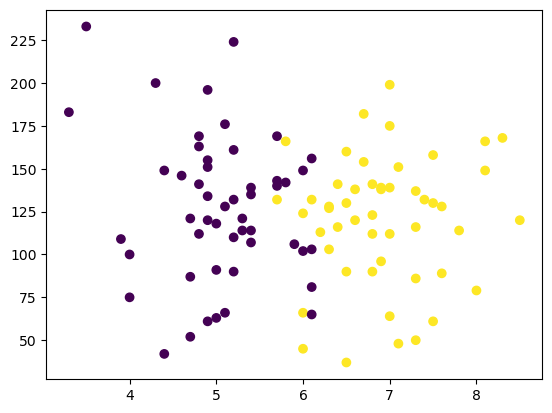

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
#yellow=placement hogaya
#viloet=placement nahi hua

In [20]:
#separating dependent and independet 
X=df.iloc[:,1:3]
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [32]:
y=df.iloc[:,-1]
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [36]:
#Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [37]:
#Scaling the values between -1 to 1 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(x_train)
X_train

array([[ 0.51720108, -2.06212466],
       [-1.08177936, -1.69630754],
       [ 0.78369782, -0.23303906],
       [-0.19345689,  1.15706601],
       [ 0.16187209, -0.45252933],
       [ 1.84968479, -1.03783672],
       [-0.10462465,  1.08390258],
       [-0.99294712, -0.23303906],
       [ 1.22785906, -1.74508316],
       [-1.34827611,  0.66930985],
       [ 1.22785906, -0.86712207],
       [-1.43710835,  1.91308806],
       [ 0.07303985,  0.66930985],
       [ 1.05019457, -1.79385878],
       [-1.08177936, -0.84273426],
       [ 0.51720108, -0.76957083],
       [-1.34827611, -1.94018562],
       [-0.90411487, -1.47681727],
       [ 0.25070434, -0.20865125],
       [ 0.33953659, -0.45252933],
       [ 0.07303985, -1.8670222 ],
       [-0.99294712,  1.01073916],
       [ 0.96136232,  0.42543176],
       [ 0.78369782,  0.47420738],
       [-1.70360509, -0.52569275],
       [-0.90411487,  1.81553683],
       [ 0.42836884,  0.47420738],
       [-1.70360509, -1.13538796],
       [-0.63761813,

In [38]:
#Training model using Logistic Regresssion
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [42]:
#Predicting
y_pred=model.predict(x_test)
y_pred

C:\Users\Ashvini Mahajan\miniconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [43]:
y_test

65    1
55    1
75    0
74    1
70    1
89    0
61    1
60    1
0     1
11    1
Name: placement, dtype: int64

In [44]:
#Calculating Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

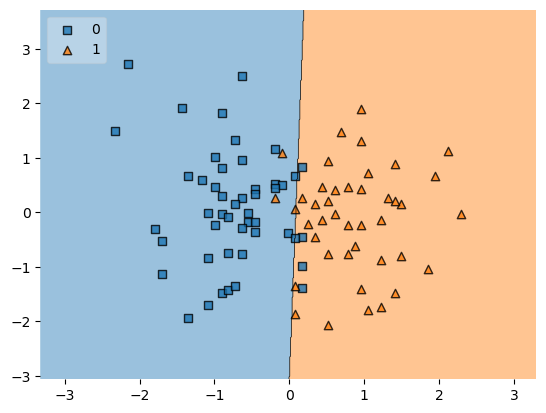

In [49]:
#Plotting Decision Regions
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values,clf=model,legend=2)

In [50]:
#Exporting the model
import pickle
pickle.dump(model,open('model.pkl','wb'))